In [1]:
import matplotlib.pyplot as plt
from src.args.base_args import B2TDatasetArgsModel
from src.args.yaml_config import YamlConfig
from src.datasets.brain2text import Brain2TextDataset
from matplotlib.animation import FuncAnimation
import numpy as np
from pathlib import Path

yaml_config = YamlConfig().config
config = B2TDatasetArgsModel()

In [2]:
config.preprocessing = "only_spikepow_zscored"
ds = Brain2TextDataset(config=config, yaml_config=yaml_config)

Got tokenizer from file


In [3]:
sample_idx = 0

sentence = ds.tokenizer.decode(ds.encoded_sentences[0].ids)
brain_data = ds.brain_data_samples[0].numpy()

In [4]:
min = brain_data.min()
max = brain_data.max()

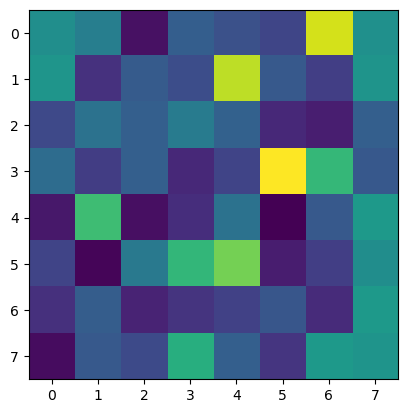

In [5]:
fig, ax = plt.subplots()
array_1 = brain_data[0,0:64].reshape((8, 8))
ax.clear()
ax.imshow(array_1, cmap='viridis', interpolation='nearest')
plt.show()

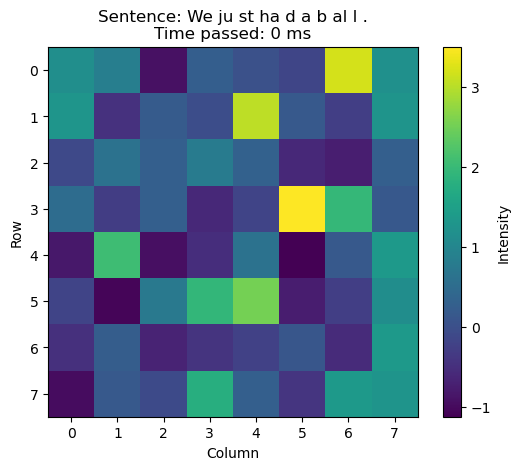

In [6]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)

# Initialize the first frame of brain_data
frame_data = brain_data[0, 0:64].reshape((8, 8))

# Create an initial heatmap
heatmap = ax.imshow(frame_data, cmap='viridis', interpolation='nearest')

ax.set(xlabel='Column', ylabel='Row', title=f"Sentence: {sentence}\nTime passed: 0 ms")

plt.colorbar(heatmap, ax=ax, label='Intensity')

def update(frame):
    # Extract frame data and reshape into a 2D array
    frame_data = brain_data[frame, 0:64].reshape((8, 8))

    # Update the data in the heatmap
    heatmap.set_array(frame_data)
    ax.set(title=f"Sentence: {sentence}\nTime passed: {20 * frame} ms")

    return [heatmap]

# Set up the animation
animation = FuncAnimation(fig, update, frames=range(len(brain_data)), interval=500, repeat=False)

# Display the animation
plt.show()

In [7]:
from IPython.display import display, HTML

animation.save(Path(yaml_config.fig_dir) / "brain_animation_heatmap.gif", writer='pillow', fps=10)

display(HTML(animation.to_jshtml()))